<a href="https://colab.research.google.com/github/Varstzeiin/Customer-Segmentation-Startup-Foboost/blob/main/%5BManajemen_Data_Ecommerce%5D_Tugas_Analisis_Pemasaran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===========================================================
# FOBOOST — Consumer Segmentation & Marketing Insight Pipeline
# ===========================================================

## Setup & Load dari Google Sheets

In [1]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

sns.set(style="whitegrid")


In [2]:
#  LOAD DATA FROM GOOGLE SHEETS

sheet_url = "https://docs.google.com/spreadsheets/d/1hh8qiTd8YKkrGTs_SiYbIPffP2dEgnj_FP47QHvHtpY/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")

df = pd.read_csv(csv_url)
df = df.reset_index(drop=True)  # reset index clean

print(f"Jumlah data awal: {len(df)}")
display(df.head())


Jumlah data awal: 150


,Timestamp,Nama,usia,jenis_kelamin,jenis_fotografi,pernah_gunakan,layanan_digunakan,fitur_dicari,frekuensi_foto,harga_photobooth,...,harga_sp_num,price_sensitivity_pb,price_sensitivity_sp,price_sensitivity_avg,digital_affinity,layanan_dominan,occasion_primary,persona_type,photobooth_interest_score,selfphoto_interest_score
0,2024-12-06 20:21:20,Gilang,20.0,Laki-Laki,"Keluarga, Potret individu",Ya,Self-photo studio,Kualitas hasil foto,1–2 kali,Rp30.000–Rp50.000 per sesi,...,75000.0,0.333333,0.571429,0.452381,1.0,selfphoto,Keluarga,personal,0.1,0.8
1,2024-12-06 22:30:49,Astri wulandari,18.0,Perempuan,Potret individu,Ya,"Photobooth pada acara (pesta pernikahan, ulang...",Kualitas hasil foto,1–2 kali,>Rp 50.000 per sesi,...,175000.0,0.000000,0.000000,0.000000,1.0,photobooth,Potret individu,personal,0.8,0.1
2,2024-12-06 23:39:01,Muhammad Saban,20.0,Laki-Laki,Keluarga,Tidak,"Photobooth pada acara (pesta pernikahan, ulang...",Kualitas hasil foto,1–2 kali,>Rp 50.000 per sesi,...,75000.0,0.000000,0.571429,0.285714,1.0,photobooth,Keluarga,personal,0.8,0.1
3,2024-12-07 12:21:35,Miftah ilun izmi,18.0,Perempuan,Potret individu,Ya,Self-photo studio,Kualitas hasil foto,1–2 kali,< Rp30.000 per sesi,...,40000.0,0.583333,0.771429,0.677381,1.0,selfphoto,Potret individu,personal,0.1,0.8
4,2024-12-07 00:22:18,Eril agustian,17.0,Laki-Laki,"Keluarga,",Tidak,Self-photo studio,Kualitas hasil foto,1–2 kali,Rp30.000–Rp50.000 per sesi,...,75000.0,0.333333,0.571429,0.452381,1.0,selfphoto,Keluarga,personal,0.1,0.8


## Pre process

In [ ]:
# DEFINISI KOLOM UTAMA

feature_cols = [
    'usia','frekuensi_num','harga_pb_num','harga_sp_num',
    'price_sensitivity_pb','price_sensitivity_sp','price_sensitivity_avg',
    'digital_affinity','photobooth_interest_score','selfphoto_interest_score'
]

persona_col  = 'persona_type'
layanan_col  = 'layanan_dominan'

In [ ]:
# CEK MISSING & DROP DATA NON-LAYAK CLUSTERING

print("\nMissing values pada fitur utama:")
print(df[feature_cols].isna().sum())



Missing values pada fitur utama:
usia                         7
frekuensi_num                7
harga_pb_num                 7
harga_sp_num                 7
price_sensitivity_pb         7
price_sensitivity_sp         7
price_sensitivity_avg        7
digital_affinity             0
photobooth_interest_score    0
selfphoto_interest_score     0
dtype: int64


In [ ]:
df[df['usia'].isna()]

,Timestamp,Nama,usia,jenis_kelamin,jenis_fotografi,pernah_gunakan,layanan_digunakan,fitur_dicari,frekuensi_foto,harga_photobooth,...,harga_sp_num,price_sensitivity_pb,price_sensitivity_sp,price_sensitivity_avg,digital_affinity,layanan_dominan,occasion_primary,persona_type,photobooth_interest_score,selfphoto_interest_score
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,unknown,unknown,personal,0.0,0.0


In [ ]:
df = df.dropna(subset=feature_cols).reset_index(drop=True)
print(f"\nJumlah data setelah cleaning: {len(df)}")



Jumlah data setelah cleaning: 143


## Distribusi data

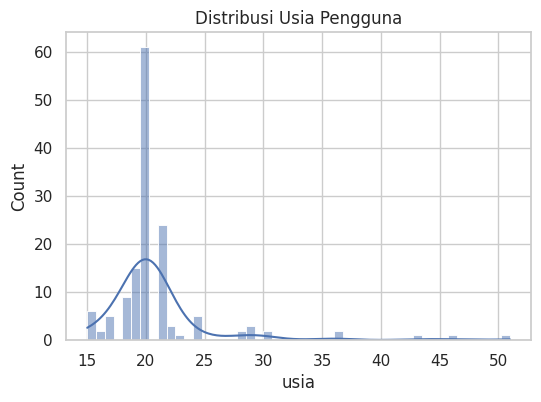

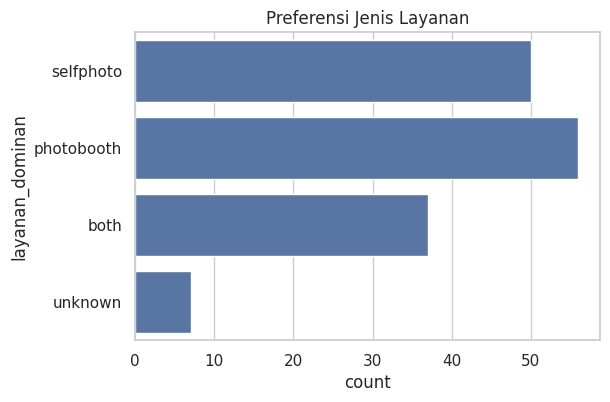

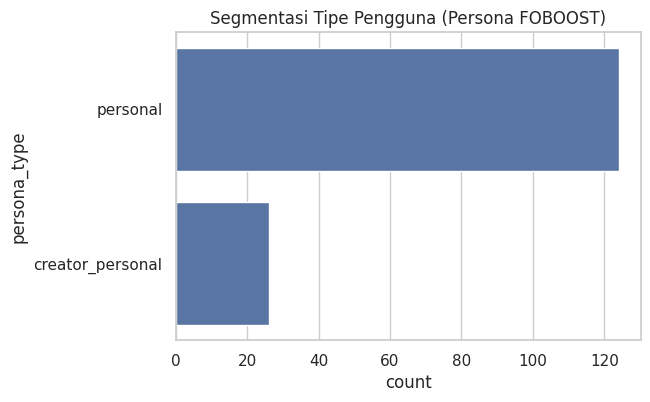

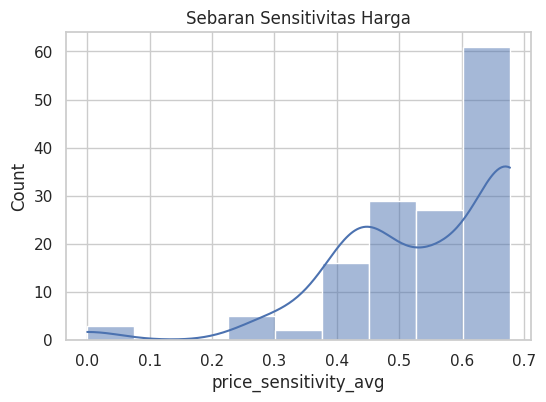

In [ ]:
# Distribusi usia
plt.figure(figsize=(6,4))
sns.histplot(df['usia'], kde=True)
plt.title("Distribusi Usia Pengguna")
plt.show()

# Layanan dominan
plt.figure(figsize=(6,4))
sns.countplot(y=df[layanan_col])
plt.title("Preferensi Jenis Layanan")
plt.show()

# Persona pengguna
plt.figure(figsize=(6,4))
sns.countplot(y=df[persona_col])
plt.title("Segmentasi Tipe Pengguna (Persona FOBOOST)")
plt.show()

# Sensitivitas harga
plt.figure(figsize=(6,4))
sns.histplot(df['price_sensitivity_avg'], kde=True)
plt.title("Sebaran Sensitivitas Harga")
plt.show()


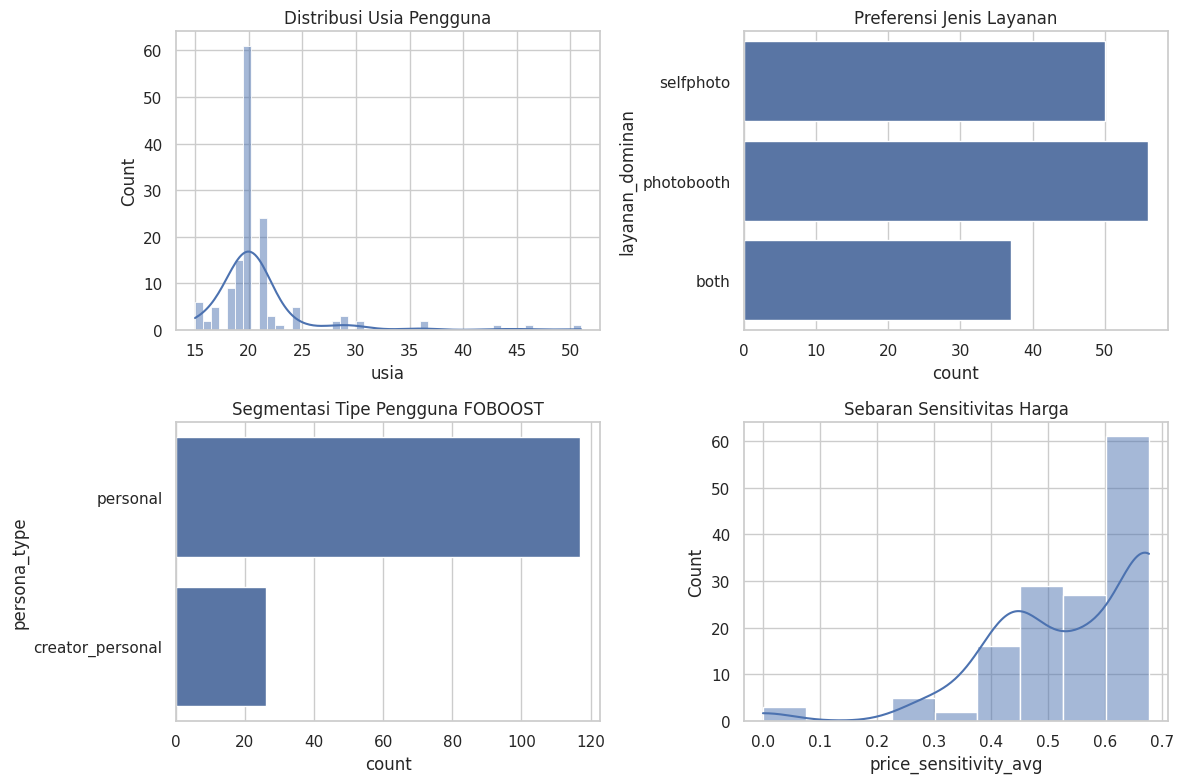

In [ ]:
# DESKRIPSI AWAL — DISTRIBUSI & POLA

fig, axs = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(df['usia'], kde=True, ax=axs[0,0])
axs[0,0].set_title("Distribusi Usia Pengguna")

sns.countplot(y=df[layanan_col], ax=axs[0,1])
axs[0,1].set_title("Preferensi Jenis Layanan")

sns.countplot(y=df[persona_col], ax=axs[1,0])
axs[1,0].set_title("Segmentasi Tipe Pengguna FOBOOST")

sns.histplot(df['price_sensitivity_avg'], kde=True, ax=axs[1,1])
axs[1,1].set_title("Sebaran Sensitivitas Harga")

plt.tight_layout()
plt.show()

Kterangan tentang Segmentasi Tipe Pengguna Foboost :  

1. Personal user: pengguna yang memprioritaskan dokumentasi momen dan kemudahan akses layanan, dengan sensitivitas harga yang relatif tinggi.
2. Creator user: pengguna yang memprioritaskan eksplorasi ekspresi visual dan fleksibilitas kreatif, dengan preferensi terhadap fitur tematik, kontrol estetika, dan nilai tambah layanan.

## Modelling

In [ ]:
# STANDARISASI FITUR UNTUK CLUSTERING

X = df[feature_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape matrix fitur (siap clustering): {X_scaled.shape}")


Shape matrix fitur (siap clustering): (143, 10)


In [ ]:
# HOPKINS STATISTIC — UJI KELAYAKAN CLUSTERING

def hopkins(X, sampling_size=30, random_state=42):
    np.random.seed(random_state)
    n, d = X.shape
    m = min(sampling_size, n-1)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    # sample real data
    X_sample = X[np.random.choice(n, m, replace=False)]
    _, w_dist = nbrs.kneighbors(X_sample)

    # sample random uniform
    mins, maxs = X.min(axis=0), X.max(axis=0)
    U = np.random.uniform(mins, maxs, size=(m, d))
    _, u_dist = nbrs.kneighbors(U)

    return float(u_dist.sum() / (u_dist.sum() + w_dist.sum()))

H = hopkins(X_scaled)
print(f"Hopkins Statistic: {H:.4f}")

Hopkins Statistic: 0.6926


### K Optimal

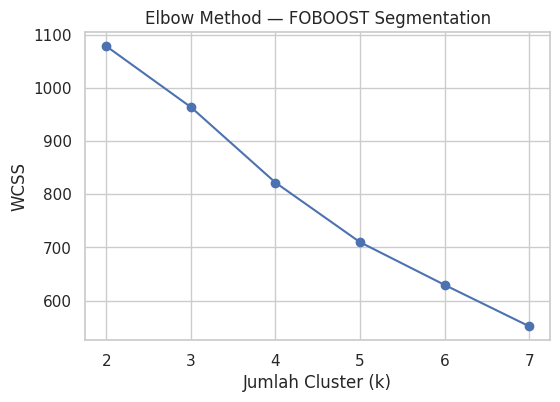

In [ ]:
#  ELBOW METHOD — PILIH K OPTIMAL

wcss = []
for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,8), wcss , marker="o")
plt.title("Elbow Method — FOBOOST Segmentation")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.show()

**PENJELASN**

Pola Umum Grafik

WCSS turun tajam dari k=2 → k=4
→ artinya penambahan cluster di rentang ini masih memberi pembeda yang kuat antar kelompok

penurunan mulai melandai setelah k=4 → k=7
→ cluster tambahan masih mengurangi error, tapi tidak signifikan → masuk wilayah diminishing return

> - k=2: terlalu general → pasar terasa “gelondongan”
> - k=3: mulai memisah preferensi → self vs photo vs both/creator
> - k=4: semakin granular → tapi risiko over-segmentation untuk dataset 142
> - k>4: improvement makin kecil → potensi noise > insight

| k     | Pro                                                                          | Kontra                                             |
| ----- | ---------------------------------------------------------------------------- | -------------------------------------------------- |
| **3** | stabil, interpretasi simpel, cocok utk rekomendasi bisnis awal               | kurang membedakan persona creator/personal         |
| **4** | segmen lebih granular: *personal / creator / event-driven / price-sensitive* | dataset 142 → risiko cluster terlalu kecil & noise |


**Apa implikasinya buat FOBOOST?**

> 1. k=3 cocok kalau FOBOOST sekarang:
>> - masih di tahap validasi problem–solution fit
>> - butuh persona luas sebelum persona micro
>> - target utama masih personal customers & event market

> 2. k=4 boleh dipilih kalau:
>> - FOBOOST udah masuk lagi ke fase pricing experiment dan upsell
>> - ingin pisahkan creator vs casual personal

---
Berdasarkan Elbow Method, jumlah cluster optimal berada pada rentang k=3–4.
Penurunan WCSS terbesar terjadi hingga k=3, kemudian melandai setelahnya,
sehingga k=3 dipilih sebagai jumlah cluster optimal karena memberikan keseimbangan terbaik
antara reduksi variansi intra-cluster dan kemudahan interpretasi segmentasi konsumen.
Selain itu, dengan dataset berukuran 142 responden, pemilihan k lebih besar dari 3
berpotensi menghasilkan cluster kecil dan kurang stabil untuk rekomendasi bisnis awal FOBOOST.

In [ ]:
#  FIT K-MEANS — CLUSTERING

k_opt = 3  # ubah jika elbow mengarah ke angka lain
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

display(df[['Nama','usia',persona_col,layanan_col,'cluster']].head())

,Nama,usia,persona_type,layanan_dominan,cluster
0,Gilang,20.0,personal,selfphoto,0
1,Astri wulandari,18.0,personal,photobooth,1
2,Muhammad Saban,20.0,personal,photobooth,1
3,Miftah ilun izmi,18.0,personal,selfphoto,0
4,Eril agustian,17.0,personal,selfphoto,0


### Profil Hasil Clustering

In [ ]:
# PROFIL CLUSTER — LANDASAN KEPUTUSAN BISNIS

cluster_profile = df.groupby('cluster')[feature_cols + [persona_col, layanan_col]].agg({
    'usia':'mean',
    'frekuensi_num':'mean',
    'harga_pb_num':'median',
    'harga_sp_num':'median',
    'price_sensitivity_avg':'mean',
    'digital_affinity':'mean',
    'photobooth_interest_score':'mean',
    'selfphoto_interest_score':'mean',
    persona_col: lambda x: x.value_counts().index[0],
    layanan_col: lambda x: x.value_counts().index[0]
}).round(2)

print("\n=== PROFIL CLUSTER — SIAP UNTUK ANALISIS FOBOOST ===")
display(cluster_profile)



=== PROFIL CLUSTER — SIAP UNTUK ANALISIS FOBOOST ===


,usia,frekuensi_num,harga_pb_num,harga_sp_num,price_sensitivity_avg,digital_affinity,photobooth_interest_score,selfphoto_interest_score,persona_type,layanan_dominan
cluster,,,,,,,,,,
0,20.38,1.52,25000.0,40000.0,0.63,0.93,0.44,0.59,personal,selfphoto
1,19.94,1.50,60000.0,75000.0,0.35,0.92,0.60,0.21,personal,photobooth
2,23.35,3.78,40000.0,75000.0,0.53,0.87,0.60,0.71,creator_personal,both


Insight:
---

----
1. Cluster 0

- Usia muda, frekuensi rendah–normal
- Suka self-photo, harga preferensi murah
- Sangat sensitif harga, terutama self-photo
→ Personal user yang suka self-photo tapi hemat / value seeker.

2. Cluster 1

- Usia hampir sama (late teens)
- Fokus ke photobooth event, mau bayar lebih tinggi untuk photobooth
- Digital_affinity rendah (lebih banyak via rekomendasi offline)
→ Personal user event-driven yang rela bayar mahal kalau acaranya penting.

Cluster 2
- Usia sedikit lebih tua, frekuensi foto paling tinggi
- Pakai dua-duanya (photobooth + self-photo)
- digital_affinity tinggi, persona creator_personal
→ Power user / creator hybrid yang sering foto dan main di dua layanan.

---

**Nama Cluster yang gampang diingat (pakai nuansa FOBOOST + foto)**
---


1. Cluster 0

- Nama pendek: Self-Saver
- Nama panjang: “Segment Self-Photo Hemat FOBOOST”
- Tagline: personal user yang suka self-photo tapi sangat price-aware.

2. Cluster 1

- Nama pendek: Event-Booth
- Nama panjang: “Segment Event Photobooth FOBOOST”
- Tagline: pengguna personal yang pakai photobooth buat momen penting & mau bayar lebih.

2. Cluster 2

- Nama pendek: Hybrid-Creator
- Nama panjang: “Segment Hybrid Creator FOBOOST”
- Tagline: power user yang sering foto, main di photobooth dan self-photo sekaligus, dan digital-minded.



## Visualisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Palet warna FOBOOST (biru – ungu – pink lembut)
FOBOOST_COLORS = [
    "#1B1D4F",  # navy
    "#2554C7",  # cobalt
    "#37AEE2",  # soft blue
    "#8A9FFF",  # violet
    "#FF4FB3",  # pink
    "#FF7AC2",  # soft pink
]

# pastikan usia numerik
df['usia'] = pd.to_numeric(df['usia'], errors='coerce')



### (a) DEMOGRAFI LANJUTAN


In [ ]:
df.columns

Index(['Timestamp', 'Nama', 'usia', 'jenis_kelamin', 'jenis_fotografi',
       'pernah_gunakan', 'layanan_digunakan', 'fitur_dicari', 'frekuensi_foto',
       'harga_photobooth', 'harga_selfphoto', 'media_informasi', 'tema_suka',
       'fitur_selfphoto_menarik', 'lokasi_strategis', 'driver_keputusan',
       'frekuensi_num', 'harga_pb_num', 'harga_sp_num', 'price_sensitivity_pb',
       'price_sensitivity_sp', 'price_sensitivity_avg', 'digital_affinity',
       'layanan_dominan', 'occasion_primary', 'persona_type',
       'photobooth_interest_score', 'selfphoto_interest_score'],
      dtype='object')

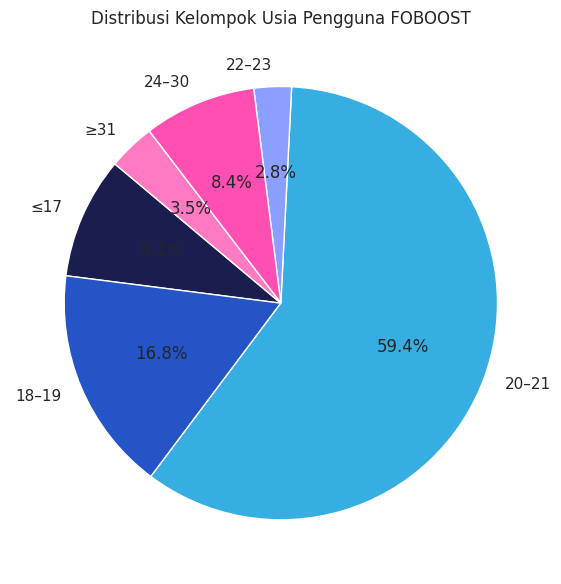

In [ ]:
# 1. Kategori umur (bins)
age_bins   = [0, 17, 19, 21, 23, 30, 100]
age_labels = ["≤17", "18–19", "20–21", "22–23", "24–30", "≥31"]
df['usia_group'] = pd.cut(df['usia'], bins=age_bins, labels=age_labels, right=True)

# Pie chart distribusi usia (pakai 5 kategori teratas + lainnya kalau mau, tapi di sini full group)
age_counts = df['usia_group'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    age_counts.values,
    labels=age_counts.index.astype(str),
    colors=FOBOOST_COLORS[:len(age_counts)],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Distribusi Kelompok Usia Pengguna FOBOOST")
plt.tight_layout()
plt.show()

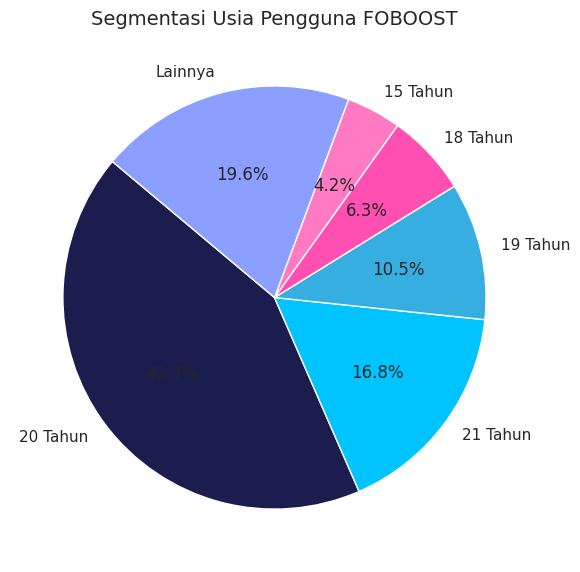

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Hitung 5 usia teratas + kategori "Lainnya" ---
# pastikan usia numerik
df['usia'] = pd.to_numeric(df['usia'], errors='coerce')

age_counts = df['usia'].value_counts().sort_values(ascending=False)

top5 = age_counts.head(5)
others_sum = age_counts.iloc[5:].sum()

labels = [f"{int(a)} Tahun" for a in top5.index] + ["Lainnya"]
sizes  = list(top5.values) + [others_sum]

# --- 2. Warna lembut selaras logo FOBOOST (biru, cyan, pink, ungu) ---
foboost_colors = sns.color_palette([
    "#1B1D4F",  # navy / dark blue
    "#00C4FF",  # cyan
    "#37AEE2",  # soft blue
    "#FF4FB3",  # pink
    "#FF7AC2",  # soft pink
    "#8A9FFF"   # soft violet
])

# --- 3. Plot pie chart ---
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=foboost_colors[:len(labels)],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Segmentasi Usia Pengguna FOBOOST", fontsize=14)
plt.tight_layout()
plt.show()


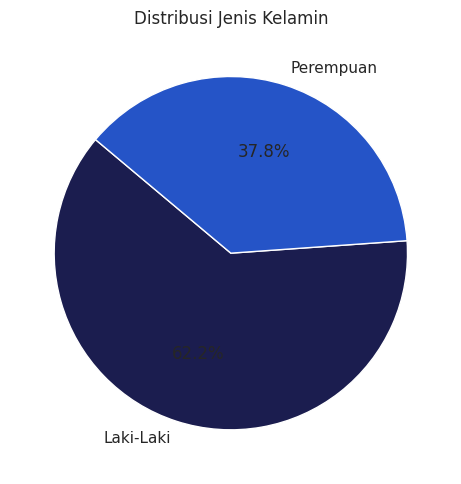

In [ ]:
# Pie chart jenis kelamin
gender_counts = df['jenis_kelamin'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    colors=FOBOOST_COLORS[:len(gender_counts)],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Distribusi Jenis Kelamin")
plt.tight_layout()
plt.show()


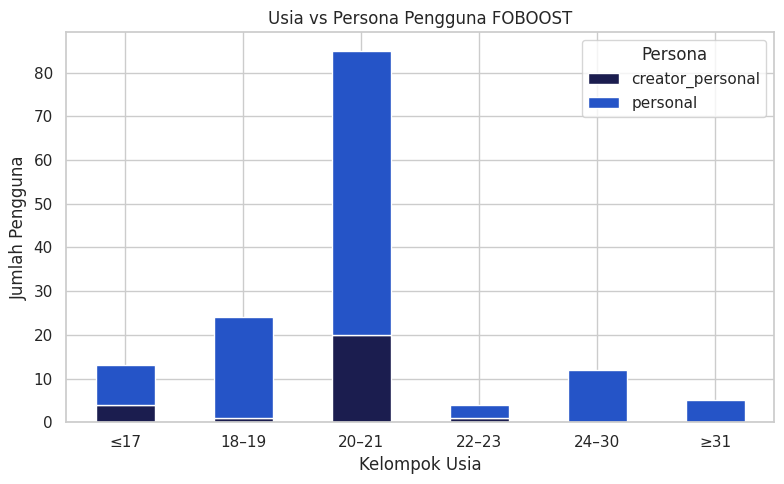

In [ ]:
# Stacked bar: usia_group × persona_type
cross_age_persona = pd.crosstab(df['usia_group'], df['persona_type'])

cross_age_persona.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=FOBOOST_COLORS[:len(cross_age_persona.columns)]
)
plt.title("Usia vs Persona Pengguna FOBOOST")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=0)
plt.legend(title="Persona")
plt.tight_layout()
plt.show()


In [ ]:
df['fitur_dicari'].value_counts()

,count
fitur_dicari,
Kualitas hasil foto,85
Privasi saat foto (untuk self-photo),27
Kemudahan akses,20
Harga terjangkau,11


/tmp/ipython-input-951339703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usia_group', y='frekuensi_num', data=df, palette=FOBOOST_COLORS[:len(age_labels)])


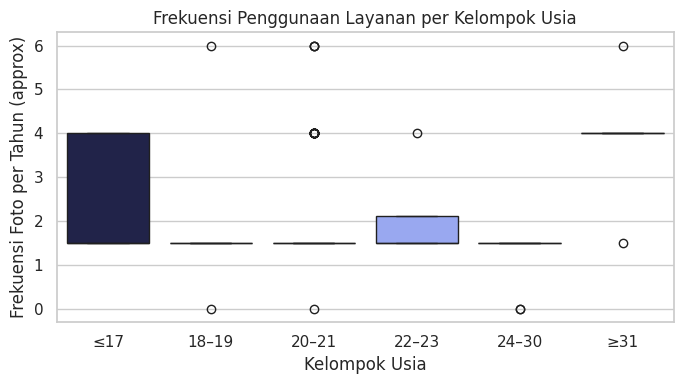

In [ ]:
# Boxplot frekuensi foto per kelompok usia
plt.figure(figsize=(7,4))
sns.boxplot(x='usia_group', y='frekuensi_num', data=df, palette=FOBOOST_COLORS[:len(age_labels)])
plt.title("Frekuensi Penggunaan Layanan per Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Frekuensi Foto per Tahun (approx)")
plt.tight_layout()
plt.show()

### Preferensi Dan Fitur

/tmp/ipython-input-4132202812.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


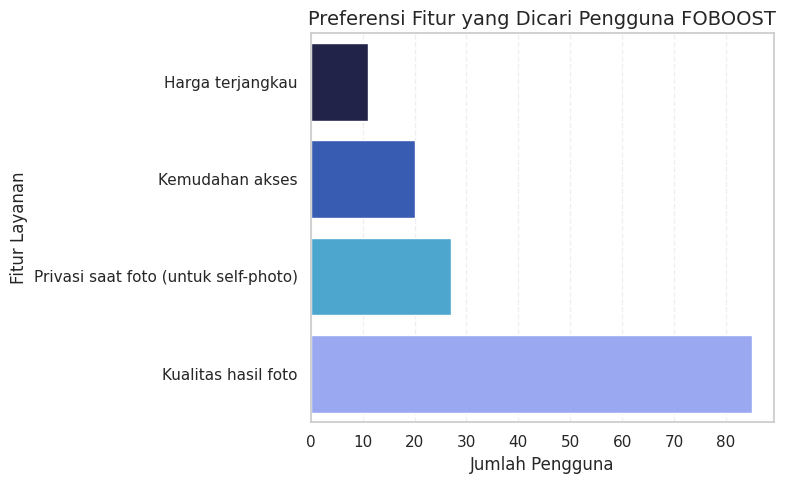

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Warna selaras FOBOOST -----
foboost_palette = sns.color_palette([
    "#1B1D4F",  # navy / dark blue
    "#2554C7",  # cobalt
    "#37AEE2",  # soft blue
    "#8A9FFF",  # violet-blue
    "#FF4FB3",  # pink
    "#FF7AC2"   # soft pink
])

# ----- Hitung dan urutkan nilai -----
fitur_counts = df['fitur_dicari'].value_counts().sort_values(ascending=True)

# ----- Plot visualisasi -----
plt.figure(figsize=(8,5))
sns.barplot(
    x=fitur_counts.values,
    y=fitur_counts.index,
    palette=foboost_palette[:len(fitur_counts)]
)
plt.title("Preferensi Fitur yang Dicari Pengguna FOBOOST", fontsize=14)
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Fitur Layanan")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


**Ketrangan**

---
Kualitas hasil foto muncul sebagai fitur paling dominan, disusul oleh fitur-fitur yang mendukung kenyamanan pengalaman pengguna seperti kemudahan akses dan filter/efek tambahan.
Pola ini menunjukkan bahwa meskipun konsumen sensitif terhadap harga, keputusan akhir tetap dipengaruhi persepsi nilai (value-perceived) yang terkait kualitas visual dan kenyamanan proses.
Implikasi untuk FOBOOST sebagai platform: pastikan vendor menonjolkan tangible value seperti portfolio, kualitas hasil, contoh cetak, dan fasilitas tambahan — bukan sekadar harga.

/tmp/ipython-input-1867604406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


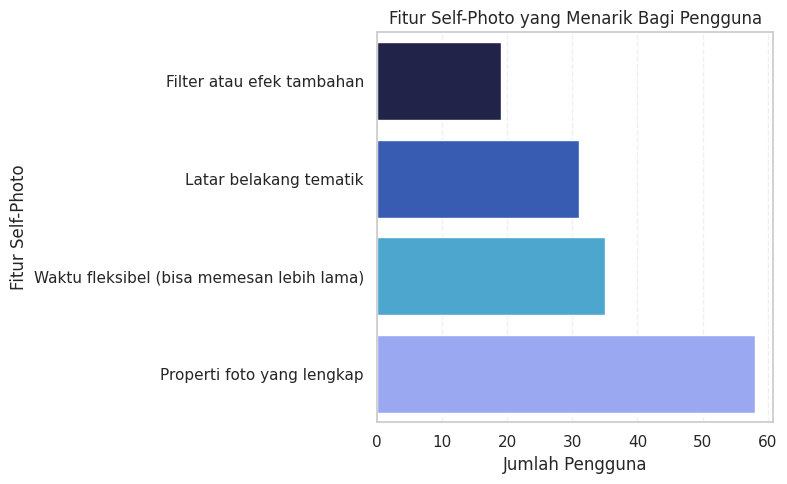

In [ ]:
# Bar: fitur_selfphoto_menarik
fitur_sp_counts = df['fitur_selfphoto_menarik'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x=fitur_sp_counts.values,
    y=fitur_sp_counts.index,
    palette=FOBOOST_COLORS[:len(fitur_sp_counts)]
)
plt.title("Fitur Self-Photo yang Menarik Bagi Pengguna")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Fitur Self-Photo")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3352821995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


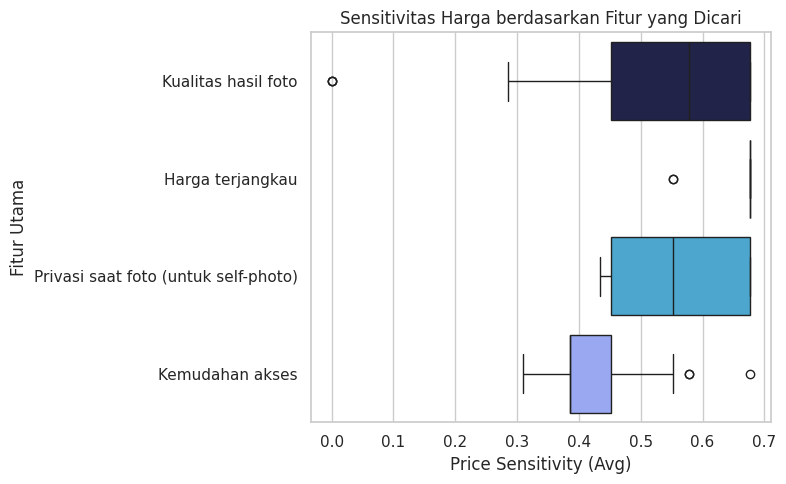

In [ ]:
# Boxplot: price_sensitivity_avg per fitur_dicari
plt.figure(figsize=(8,5))
sns.boxplot(
    y='fitur_dicari',
    x='price_sensitivity_avg',
    data=df,
    palette=FOBOOST_COLORS[:len(fitur_counts)]
)
plt.title("Sensitivitas Harga berdasarkan Fitur yang Dicari")
plt.xlabel("Price Sensitivity (Avg)")
plt.ylabel("Fitur Utama")
plt.tight_layout()
plt.show()

### Harga dan Sensitivitas

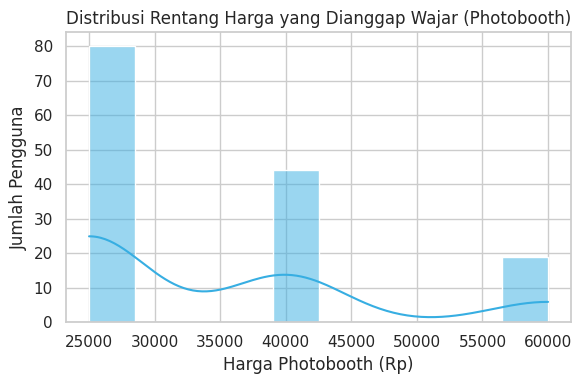

In [ ]:
# Histogram harga photobooth
plt.figure(figsize=(6,4))
sns.histplot(df['harga_pb_num'], kde=True, bins=10, color=FOBOOST_COLORS[2])
plt.title("Distribusi Rentang Harga yang Dianggap Wajar (Photobooth)")
plt.xlabel("Harga Photobooth (Rp)")
plt.ylabel("Jumlah Pengguna")
plt.tight_layout()
plt.show()


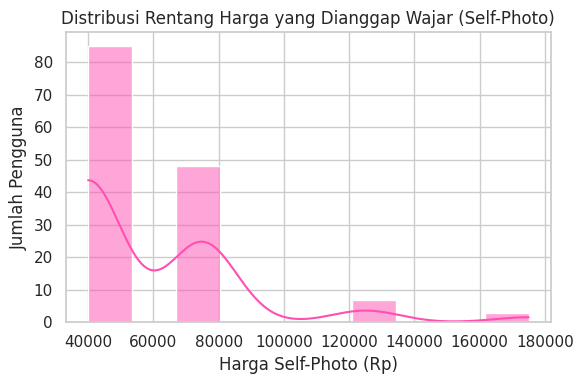

In [ ]:
# Histogram harga self-photo
plt.figure(figsize=(6,4))
sns.histplot(df['harga_sp_num'], kde=True, bins=10, color=FOBOOST_COLORS[4])
plt.title("Distribusi Rentang Harga yang Dianggap Wajar (Self-Photo)")
plt.xlabel("Harga Self-Photo (Rp)")
plt.ylabel("Jumlah Pengguna")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3768445186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='price_sensitivity_avg', data=df, palette=FOBOOST_COLORS[:len(df['cluster'].unique())])


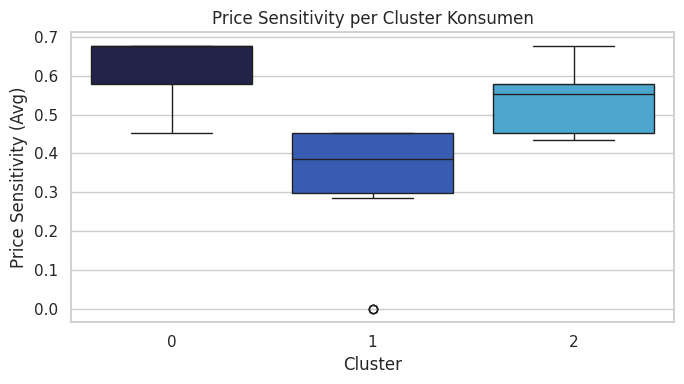

In [ ]:
# Boxplot sensitivitas harga per cluster
plt.figure(figsize=(7,4))
sns.boxplot(x='cluster', y='price_sensitivity_avg', data=df, palette=FOBOOST_COLORS[:len(df['cluster'].unique())])
plt.title("Price Sensitivity per Cluster Konsumen")
plt.xlabel("Cluster")
plt.ylabel("Price Sensitivity (Avg)")
plt.tight_layout()
plt.show()


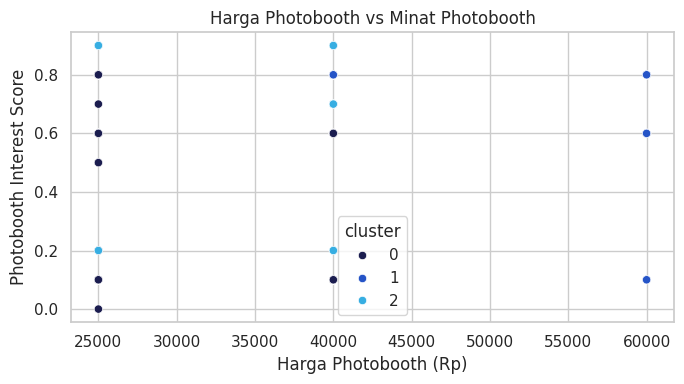

In [ ]:
# Scatter: harga_pb_num vs photobooth_interest_score
plt.figure(figsize=(7,4))
sns.scatterplot(
    x='harga_pb_num',
    y='photobooth_interest_score',
    hue='cluster',
    data=df,
    palette=FOBOOST_COLORS[:len(df['cluster'].unique())]
)
plt.title("Harga Photobooth vs Minat Photobooth")
plt.xlabel("Harga Photobooth (Rp)")
plt.ylabel("Photobooth Interest Score")
plt.tight_layout()
plt.show()

### LOKASI & KANAL INFORMASI

/tmp/ipython-input-2747845902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


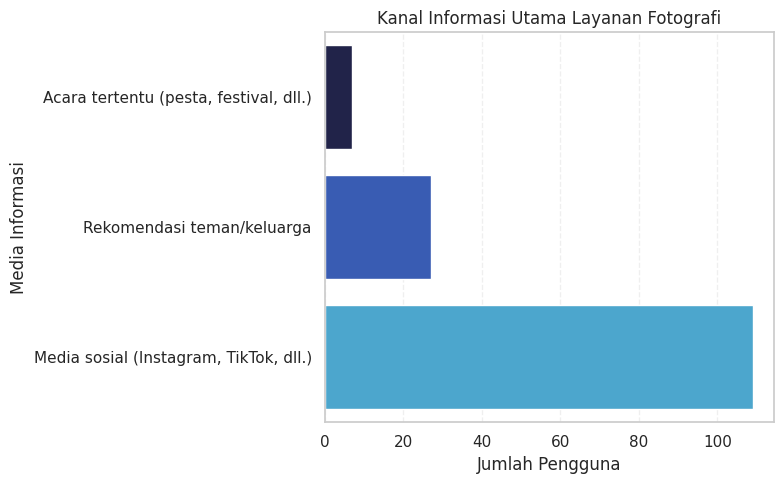

In [ ]:
# Bar: media_informasi
media_counts = df['media_informasi'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x=media_counts.values,
    y=media_counts.index,
    palette=FOBOOST_COLORS[:len(media_counts)]
)
plt.title("Kanal Informasi Utama Layanan Fotografi")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Media Informasi")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2985765064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


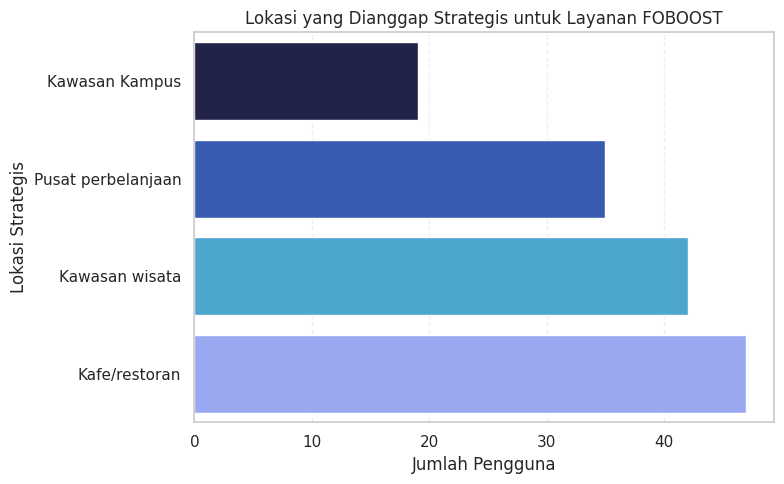

In [ ]:
# Bar: lokasi_strategis
lokasi_counts = df['lokasi_strategis'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x=lokasi_counts.values,
    y=lokasi_counts.index,
    palette=FOBOOST_COLORS[:len(lokasi_counts)]
)
plt.title("Lokasi yang Dianggap Strategis untuk Layanan FOBOOST")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Lokasi Strategis")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


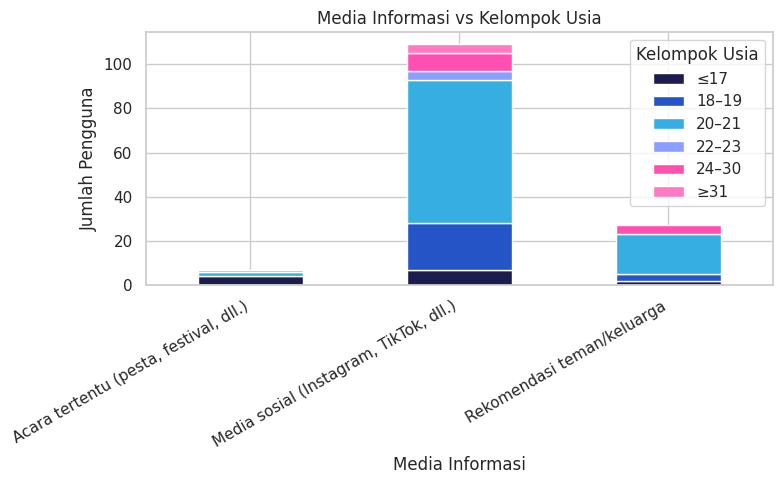

In [ ]:
# (opsional) Stacked bar: media_informasi × usia_group
cross_media_age = pd.crosstab(df['media_informasi'], df['usia_group'])

cross_media_age.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=FOBOOST_COLORS[:len(cross_media_age.columns)]
)
plt.title("Media Informasi vs Kelompok Usia")
plt.xlabel("Media Informasi")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Kelompok Usia")
plt.tight_layout()
plt.show()


### Cluster Segmentation dan Persona Foboost

/tmp/ipython-input-3564172219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette=FOBOOST_COLORS[:len(df['cluster'].unique())])


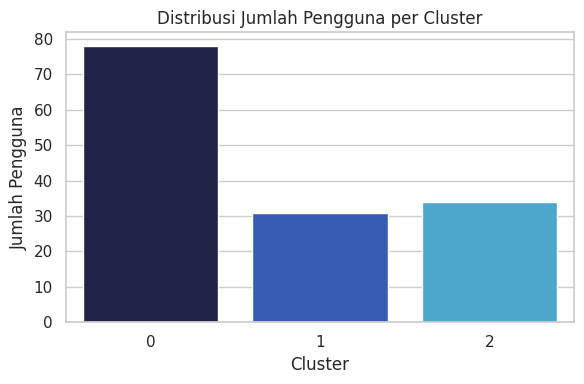

In [ ]:
# Countplot jumlah anggota tiap cluster
plt.figure(figsize=(6,4))
sns.countplot(x='cluster', data=df, palette=FOBOOST_COLORS[:len(df['cluster'].unique())])
plt.title("Distribusi Jumlah Pengguna per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pengguna")
plt.tight_layout()
plt.show()


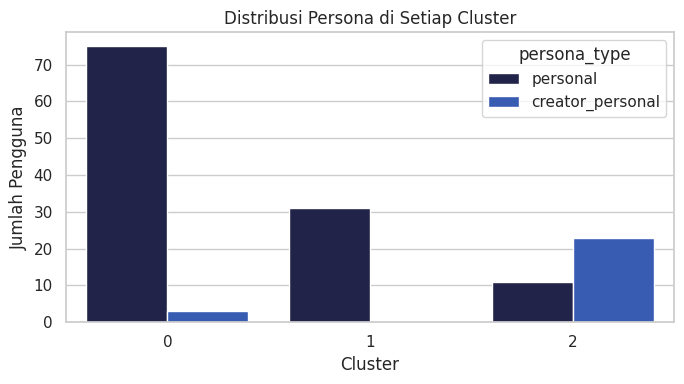

In [ ]:
# Cluster × persona_type
plt.figure(figsize=(7,4))
sns.countplot(x='cluster', hue='persona_type', data=df,
              palette=FOBOOST_COLORS[:len(df['persona_type'].unique())])
plt.title("Distribusi Persona di Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pengguna")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2460416429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='photobooth_interest_score', data=df,


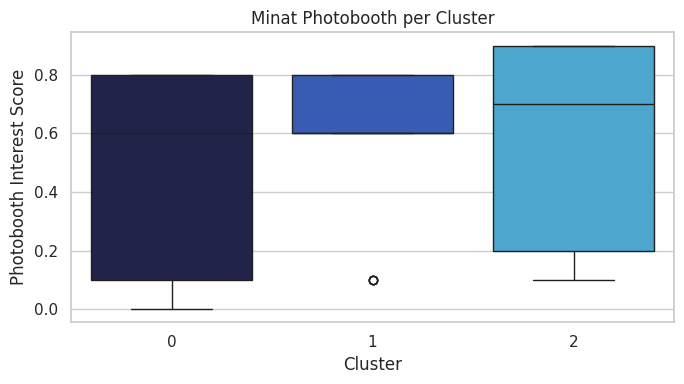

In [ ]:
# Boxplot: cluster vs photobooth_interest_score
plt.figure(figsize=(7,4))
sns.boxplot(x='cluster', y='photobooth_interest_score', data=df,
            palette=FOBOOST_COLORS[:len(df['cluster'].unique())])
plt.title("Minat Photobooth per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Photobooth Interest Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1691993589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='selfphoto_interest_score', data=df,


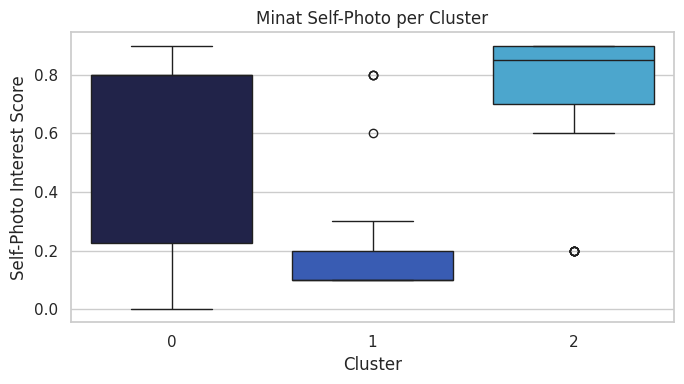

In [ ]:
# Boxplot: cluster vs selfphoto_interest_score
plt.figure(figsize=(7,4))
sns.boxplot(x='cluster', y='selfphoto_interest_score', data=df,
            palette=FOBOOST_COLORS[:len(df['cluster'].unique())])
plt.title("Minat Self-Photo per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Self-Photo Interest Score")
plt.tight_layout()
plt.show()

In [ ]:
# mapping nama cluster
cluster_name_map = {
    0: "Self-Photo Hemat (Self-Saver)",
    1: "Event Photobooth (Event-Booth)",
    2: "Hybrid Creator (Hybrid-Creator)"
}

df['cluster_name'] = df['cluster'].map(cluster_name_map)

# kalau kamu punya cluster_profile dari groupby:
cluster_profile = df.groupby('cluster').agg({
    'usia':'mean',
    'frekuensi_num':'mean',
    'harga_pb_num':'median',
    'harga_sp_num':'median',
    'price_sensitivity_pb':'mean',
    'price_sensitivity_sp':'mean',
    'price_sensitivity_avg':'mean',
    'digital_affinity':'mean',
    'photobooth_interest_score':'mean',
    'selfphoto_interest_score':'mean',
    'persona_type': lambda x: x.value_counts().index[0],
    'layanan_dominan': lambda x: x.value_counts().index[0]
}).round(2)

cluster_profile['cluster_name'] = cluster_profile.index.map(cluster_name_map)
cluster_profile


,usia,frekuensi_num,harga_pb_num,harga_sp_num,price_sensitivity_pb,price_sensitivity_sp,price_sensitivity_avg,digital_affinity,photobooth_interest_score,selfphoto_interest_score,persona_type,layanan_dominan,cluster_name
cluster,,,,,,,,,,,,,
0,20.38,1.52,25000.0,40000.0,0.54,0.72,0.63,0.93,0.44,0.59,personal,selfphoto,Self-Photo Hemat (Self-Saver)
1,19.94,1.50,60000.0,75000.0,0.13,0.57,0.35,0.92,0.60,0.21,personal,photobooth,Event Photobooth (Event-Booth)
2,23.35,3.78,40000.0,75000.0,0.45,0.62,0.53,0.87,0.60,0.71,creator_personal,both,Hybrid Creator (Hybrid-Creator)


/tmp/ipython-input-3798926680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_name', data=df, palette=FOBOOST_COLORS[:3])


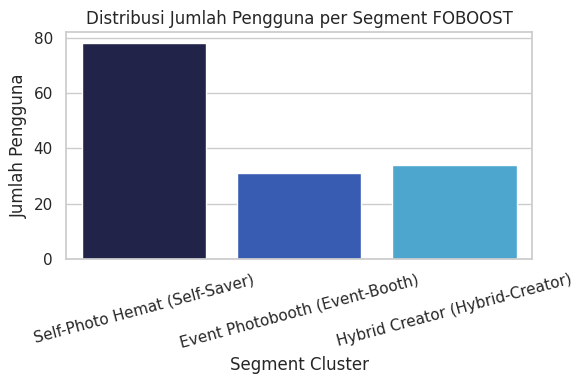

In [ ]:
## Bar plot ukuran cluster
plt.figure(figsize=(6,4))
sns.countplot(x='cluster_name', data=df, palette=FOBOOST_COLORS[:3])
plt.title("Distribusi Jumlah Pengguna per Segment FOBOOST")
plt.xlabel("Segment Cluster")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


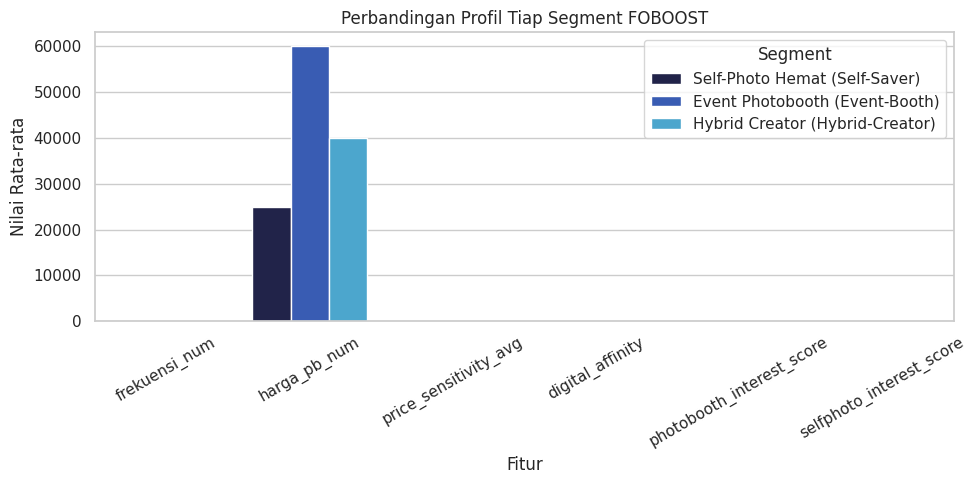

In [ ]:
## Visualisasi profil numerik antar cluster (grouped bar)
plot_cols = [
    'frekuensi_num',
    'harga_pb_num',
    'price_sensitivity_avg',
    'digital_affinity',
    'photobooth_interest_score',
    'selfphoto_interest_score'
]

profile_plot = cluster_profile.reset_index()[['cluster_name'] + plot_cols]
profile_melt = profile_plot.melt(id_vars='cluster_name',
                                 var_name='feature',
                                 value_name='value')

plt.figure(figsize=(10,5))
sns.barplot(
    x='feature',
    y='value',
    hue='cluster_name',
    data=profile_melt,
    palette=FOBOOST_COLORS[:3]
)
plt.title("Perbandingan Profil Tiap Segment FOBOOST")
plt.xlabel("Fitur")
plt.ylabel("Nilai Rata-rata")
plt.xticks(rotation=30)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


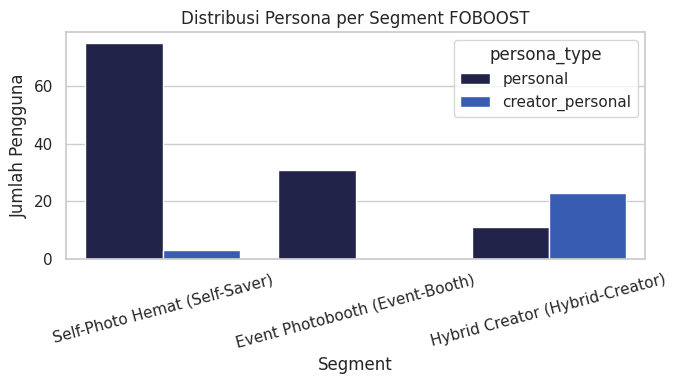

In [ ]:
## Persona per cluster (sekalian tegaskan positioning)
plt.figure(figsize=(7,4))
sns.countplot(x='cluster_name', hue='persona_type', data=df,
              palette=FOBOOST_COLORS[:len(df['persona_type'].unique())])
plt.title("Distribusi Persona per Segment FOBOOST")
plt.xlabel("Segment")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
